In [1]:
import pandas as pd
# import data
data = pd.DataFrame(pd.read_table("data/df_audio_features_10.csv", sep=","))

# prepare data (drop non-numericals)
data_df = data.drop(["song_name", "artist", "id", "html"], axis=1)

# Scaler Function

In [2]:
def scaler_5heatmaps(data_df):
    
    # This function is about
  
    # - purpose: help to choose one of five scaler methods for given dataset
    #   (out of scaler methods: MinMax- Standard-, Robust-Scaler, as well as Quantile- and Power-Transformer)
    
    # - provides: five different heatmaps, based on the same given data
    #   (each heatmap is for one of the above scaler metheds)
    
    # - input: dataframe, with numerical values
    # - output: five heatmaps, each using a different scaler methode on the same input data

    # how to use this scaler function
    # - python/pandas function, to be called out of a code by using 'scaler_5heatmaps()' as statement
    #   e.g.:  pop_stat_df = pd.read_table(your_data_file.csv)  # = load your data
    #          scaler_5heatmaps(pop_stat_df)                    # = calling the function
    # - the scaler function must be inserted into code ahead of the calling
    
    
    #libraries
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
    from sklearn.metrics import pairwise_distances

    df = data_df
    
    methods = ["minmax", "standard", "robust", "quantile", "power"]
    scalers = [MinMaxScaler(feature_range=(0, 1)), StandardScaler(), RobustScaler(), QuantileTransformer(n_quantiles=df.shape[0], output_distribution='uniform'), PowerTransformer()]

    # Scaling
    scaled_dfs = {}
    for m, s in zip(methods, scalers):
        scaled_dfs[m + "_scaled_df"] = pd.DataFrame(s.fit_transform(df), index=df.index, columns=df.columns)
    
    # Euclidean Distances
    euclidean_arrays = {}
    for m in methods:
        distances_array = pairwise_distances(scaled_dfs[m + "_scaled_df"], metric='euclidean')
        euclidean_arrays["Euclidean_"+m+"_array"] = pd.DataFrame(distances_array, index=df.index, columns=df.index,)
    
    # Heatmaps
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 12))
    axes = {"ax1": ax1, "ax2": ax2, "ax3": ax3, "ax4": ax4, "ax5": ax5, "ax6": ax6}
    for m, a in zip(methods, axes.values()):
        sns.heatmap(euclidean_arrays["Euclidean_"+m+"_array"], ax=a, linewidths=.2)
        a.set_title(m + "_scaled")
    plt.show()
    
    return
    #return scaled_dfs

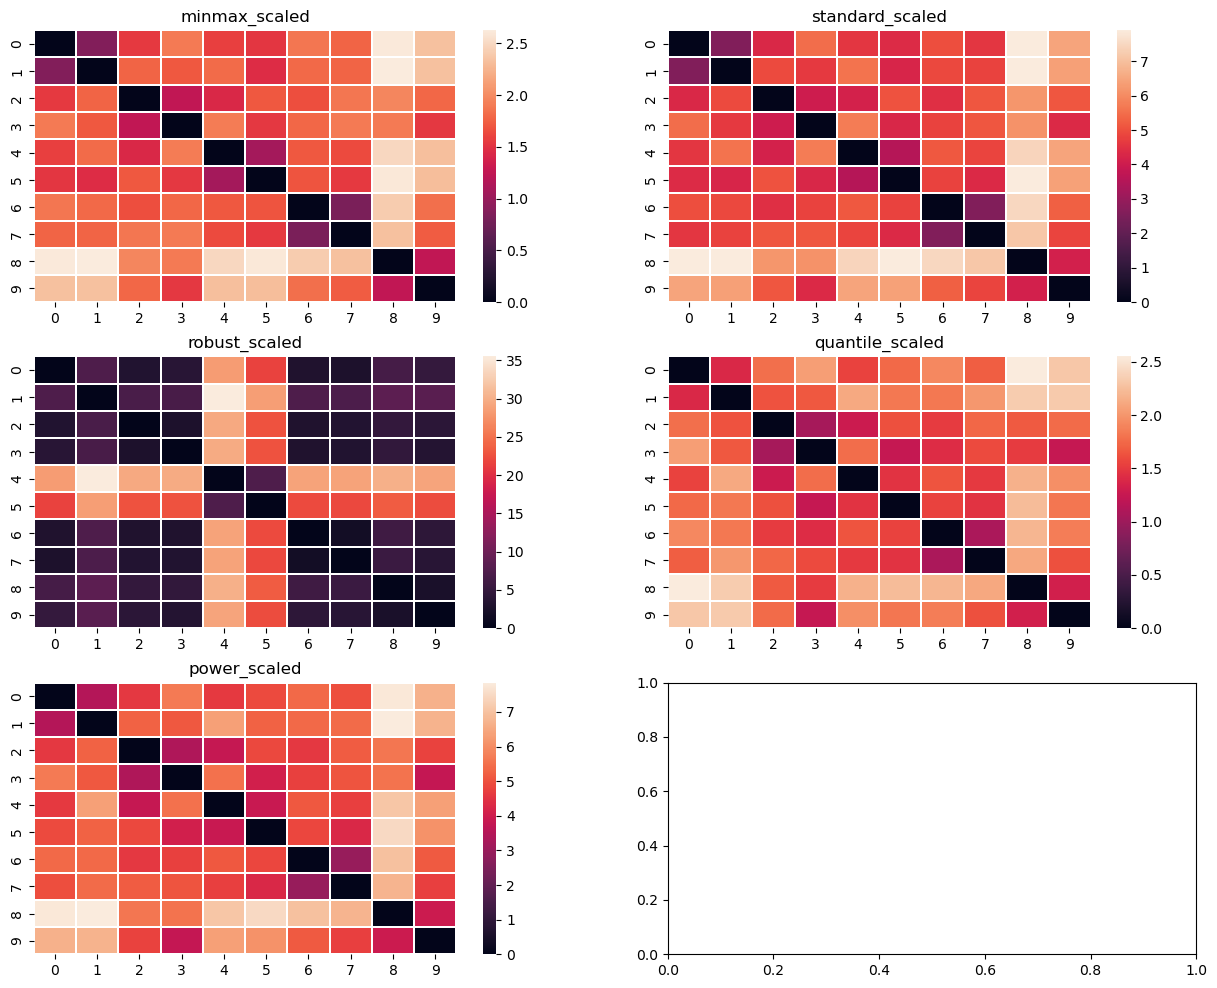

In [3]:
# call function
scaler_5heatmaps(data_df)